# Notebook 2: Analyzing Energy Efficiency Over Time
In my exploring 2017 notebook, I got an idea of the type of analysis that I want to compare over time -- energy STAR scores and GHG emissions.

In this notebook, I want to set up my dataframes to be able to compare greenhouse gas emissions and energy STAR scores over time for both Philly as a whole and by property type. For sake of my analysis, I am focusing on the following 5 property types:
* Office
* Industrial
* Retail
* Housing
* Education

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import glob
import numpy as np

#import energy usage data of Philadelphia's buildings from 2013-2017
yr2013_df = pd.read_csv('../data/energy_usage_large_commercial_buildings_reported_2013.csv')
yr2014_df = pd.read_csv('../data/energy_usage_large_commercial_buildings_reported_2014.csv')
yr2015_df = pd.read_csv('../data/properties_reported_2015.csv')
yr2016_df = pd.read_csv('../data/properties_reported_2016.csv')
yr2017_df = pd.read_csv('../data/properties_reported_2017.csv')



## Step 1: Analyzing Greenhouse Gas Emissions Over Time

### GHG Emissions / Property Type Over Time
First, I need to bring over the code that I created in the 2017 df. This code created a dictionary for the property types so that we could condense all the various types into broader categories -- more reflective of the real estate industy categories. 

In [2]:
#create dictionary for the property types
categories = {
    'Housing' : ['Multifamily Housing', 'Residential Care Facility', 'Other - Lodging/Residential', 'Residence Hall/Dormitory', 'Senior Care Community'],
    'Office' : ['Office', 'Financial Office'],
    'Science' : ['Other - Technology/Science', 'Data Center', 'Laboratory'],
    'Education' : ['K-12 School', 'College/University', 'Other - Education', 'Adult Education'],
    'Industrial' : ['Wastewater Treatment Plant', 'Other - Utility', 'Drinking Water Treatment & Distribution', 'Non-Refridgerated Warehouse', 'Distribution Center', 'Manufacturing/Industrial Plant', 'Self-Storage Facility', 'Refrigerated Warehouse'],
    'Hospitality' : ['Hotel'],
    'Retail' : ['Enclosed Mall', 'Wholesale Club/Supercenter', 'Food Sales', 'Bar/Nightclub', 'Automobile Dealership', 'Mailing Center/Post Office', 'Restaurant', 'Food Service', 'Retail Store','Supermarket/Grocery Store', 'Other - Mall','Strip Mall', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'],
    'Medical' : ['Other - Specialty Hospital', 'Hospital (General Medical & Surgical)', 'Outpatient Rehabilitation/Physical Therapy', 'Ambulatory Surgical Center', 'Medical Office'],
    'Religious' : ['Worship Facility'],
    'Sports/Entertainment' : ['Stadium (Open)', 'Other - Recreation', 'Ice/Curling Rink', 'Movie Theater', 'Fitness Center/Health Club/Gym', 'Stadium (Closed)', 'Performing Arts'],
    'Convention Center' : ['Convention Center'],
    'Public Services/Gov' : ['Other - Public Services', 'Social/Meeting Hall', 'Museum', 'Library', 'Courthouse'],
    'Prison' : ['Prison/Incarceration'],
    'Parking' : ['Parking'],
    'Mixed Use' : ['Mixed Use Property'],
    'Other': ['Other']
}



In [3]:
categories2={}
for k, vlist in categories.items():
    for v in vlist:
        categories2[v]=k

#### Create new column: prop_type_cond = mapping each property type to a broader category for my analysis
Now I want to create a new row in each data frame for these condensed property types

In [4]:
yr2017_df['prop_type_cond'] = yr2017_df['primary_prop_type_epa_calc'].map(categories2)

In [5]:
yr2017_df['prop_type_cond'].value_counts()

Housing                 437
Education               348
Office                  201
Industrial              116
Retail                   84
Medical                  47
Hospitality              45
Other                    37
Parking                  35
Mixed Use                34
Public Services/Gov      30
Religious                13
Sports/Entertainment      9
Science                   8
Prison                    6
Convention Center         2
Name: prop_type_cond, dtype: int64

In [6]:
yr2016_df['prop_type_cond'] = yr2016_df['primary_prop_type_epa_calc'].map(categories2)

In [7]:
yr2016_df['prop_type_cond'].value_counts()

Housing                 455
Education               350
Office                  202
Industrial              113
Retail                   79
Medical                  47
Hospitality              42
Other                    40
Parking                  35
Mixed Use                32
Public Services/Gov      32
Religious                11
Sports/Entertainment     10
Science                   8
Prison                    7
Convention Center         2
Name: prop_type_cond, dtype: int64

In [8]:
yr2015_df['prop_type_cond'] = yr2015_df['primary_prop_type_epa_calc'].map(categories2)

In [9]:
yr2015_df['prop_type_cond'].value_counts()

Education               345
Office                  192
Industrial              118
Retail                   84
Other                    62
Medical                  50
Hospitality              43
Parking                  31
Public Services/Gov      31
Housing                  23
Religious                14
Sports/Entertainment     12
Science                   7
Prison                    6
Mixed Use                 3
Convention Center         2
Name: prop_type_cond, dtype: int64

In [10]:
yr2014_df['prop_type_cond'] = yr2014_df['primary_property_type_epa_calculated'].map(categories2)

In [11]:
yr2014_df['prop_type_cond'].value_counts()

Education               301
Office                  176
Industrial              100
Retail                   76
Other                    58
Medical                  42
Housing                  35
Hospitality              32
Public Services/Gov      27
Parking                  26
Religious                14
Sports/Entertainment      8
Science                   6
Prison                    6
Convention Center         2
Mixed Use                 2
Name: prop_type_cond, dtype: int64

In [12]:
yr2013_df['prop_type_cond'] = yr2013_df['primary_property_type_epa_calculated'].map(categories2)

In [13]:
yr2013_df['prop_type_cond'].value_counts()

Education               260
Office                  169
Industrial              118
Retail                   78
Other                    65
Medical                  43
Housing                  37
Hospitality              35
Parking                  31
Public Services/Gov      28
Religious                14
Sports/Entertainment      7
Science                   6
Prison                    5
Convention Center         2
Name: prop_type_cond, dtype: int64

#### Now I need to create new dataframe per property type per year

First, I make new dataframes with per property type  per year

In [14]:
yr2013_housing = yr2013_df[yr2013_df['prop_type_cond'].isin(['Housing'])]

In [15]:
yr2014_housing = yr2014_df[yr2014_df['prop_type_cond'].isin(['Housing'])]

In [16]:
yr2015_housing = yr2015_df[yr2015_df['prop_type_cond'].isin(['Housing'])]

In [17]:
yr2016_housing = yr2016_df[yr2016_df['prop_type_cond'].isin(['Housing'])]

In [18]:
yr2017_housing = yr2017_df[yr2017_df['prop_type_cond'].isin(['Housing'])]

#### Calculate yearly means per property type
Here I use np.nanmean as a way to let the NaN's of the dataframe be excluded from my average.

##### Housing GHG Emissions (averages per year)

In [19]:
np.nanmean(yr2013_housing['total_ghg_emissions_mtco2e'])

1209.1235294117648

In [20]:
np.nanmean(yr2014_housing['total_ghg_emissions_mtco2e'])

1207.3823529411766

In [21]:
np.nanmean(yr2015_housing['total_ghg_emissions_mtco2e'])

1091.9238095238095

In [22]:
np.nanmean(yr2016_housing['total_ghg_emissions_mtco2e'])

1112.2093750000001

In [23]:
np.nanmean(yr2017_housing['total_ghg_emissions_mtco2e'])

1037.6772093023255

##### Office GHG Emissions (averages per year)

In [24]:
yr2013_office = yr2013_df[yr2013_df['prop_type_cond'].isin(['Office'])]

In [25]:
yr2014_office = yr2014_df[yr2014_df['prop_type_cond'].isin(['Office'])]

In [26]:
yr2015_office = yr2015_df[yr2015_df['prop_type_cond'].isin(['Office'])]

In [27]:
yr2016_office = yr2016_df[yr2016_df['prop_type_cond'].isin(['Office'])]

In [28]:
yr2017_office = yr2017_df[yr2017_df['prop_type_cond'].isin(['Office'])]

In [29]:
np.nanmean(yr2013_office['total_ghg_emissions_mtco2e'])

3151.7652694610783

In [30]:
np.nanmean(yr2014_office['total_ghg_emissions_mtco2e'])

3274.802285714286

In [31]:
np.nanmean(yr2015_office['total_ghg_emissions_mtco2e'])

3172.988421052632

In [32]:
np.nanmean(yr2016_office['total_ghg_emissions_mtco2e'])

2559.1029702970295

In [33]:
np.nanmean(yr2017_office['total_ghg_emissions_mtco2e'])

5124.873999999999

##### Education GHG Emissions (averages per year)

In [34]:
yr2013_edu = yr2013_df[yr2013_df['prop_type_cond'].isin(['Education'])]

In [35]:
yr2014_edu = yr2014_df[yr2014_df['prop_type_cond'].isin(['Education'])]

In [36]:
yr2015_edu = yr2015_df[yr2015_df['prop_type_cond'].isin(['Education'])]

In [37]:
yr2016_edu = yr2016_df[yr2016_df['prop_type_cond'].isin(['Education'])]

In [38]:
yr2017_edu = yr2017_df[yr2017_df['prop_type_cond'].isin(['Education'])]

In [39]:
np.nanmean(yr2013_edu['total_ghg_emissions_mtco2e'])

1269.7325581395348

In [40]:
np.nanmean(yr2014_edu['total_ghg_emissions_mtco2e'])

1222.3294314381271

In [41]:
np.nanmean(yr2015_edu['total_ghg_emissions_mtco2e'])

1153.4668604651163

In [42]:
np.nanmean(yr2016_edu['total_ghg_emissions_mtco2e'])

1862.0567723342938

In [43]:
np.nanmean(yr2017_edu['total_ghg_emissions_mtco2e'])

1646.1586510263928

##### Retail GHG Emissions (averages per year)

In [44]:
yr2013_retail = yr2013_df[yr2013_df['prop_type_cond'].isin(['Retail'])]

In [45]:
yr2014_retail = yr2014_df[yr2014_df['prop_type_cond'].isin(['Retail'])]

In [46]:
yr2015_retail = yr2015_df[yr2015_df['prop_type_cond'].isin(['Retail'])]

In [47]:
yr2016_retail = yr2016_df[yr2016_df['prop_type_cond'].isin(['Retail'])]

In [48]:
yr2017_retail = yr2017_df[yr2017_df['prop_type_cond'].isin(['Retail'])]

In [49]:
np.nanmean(yr2013_retail['total_ghg_emissions_mtco2e'])

1551.3065789473685

In [50]:
np.nanmean(yr2014_retail['total_ghg_emissions_mtco2e'])

1469.3416666666667

In [51]:
np.nanmean(yr2015_retail['total_ghg_emissions_mtco2e'])

1439.9463414634145

In [52]:
np.nanmean(yr2016_retail['total_ghg_emissions_mtco2e'])

1048.0025974025973

In [53]:
np.nanmean(yr2017_retail['total_ghg_emissions_mtco2e'])

1196.443373493976

##### Industrial GHG Emissions (averages per year)

In [54]:
yr2013_indust = yr2013_df[yr2013_df['prop_type_cond'].isin(['Industrial'])]

In [55]:
yr2014_indust = yr2014_df[yr2014_df['prop_type_cond'].isin(['Industrial'])]

In [56]:
yr2015_indust = yr2015_df[yr2015_df['prop_type_cond'].isin(['Industrial'])]

In [57]:
yr2016_indust = yr2016_df[yr2016_df['prop_type_cond'].isin(['Industrial'])]

In [58]:
yr2017_indust = yr2017_df[yr2017_df['prop_type_cond'].isin(['Industrial'])]

In [59]:
np.nanmean(yr2013_indust['total_ghg_emissions_mtco2e'])

2157.18547008547

In [60]:
np.nanmean(yr2014_indust['total_ghg_emissions_mtco2e'])

2467.942424242424

In [61]:
np.nanmean(yr2015_indust['total_ghg_emissions_mtco2e'])

2266.390178571429

In [62]:
np.nanmean(yr2016_indust['total_ghg_emissions_mtco2e'])

1851.92

In [63]:
np.nanmean(yr2017_indust['total_ghg_emissions_mtco2e'])

1054.0705357142856

### Get the mean per year of all the properties

In [64]:
np.nanmean(yr2013_df['total_ghg_emissions_mtco2e'])

2710.6108273748723

In [65]:
np.nanmean(yr2014_df['total_ghg_emissions_mtco2e'])

2509.941277890466

In [66]:
np.nanmean(yr2015_df['total_ghg_emissions_mtco2e'])

2526.0945504087194

In [67]:
np.nanmean(yr2016_df['total_ghg_emissions_mtco2e'])

2475.085947712418

In [68]:
np.nanmean(yr2017_df['total_ghg_emissions_mtco2e'])

2280.105410821643

## Step 2: Create new CSV with the calculated means

I created my own new CSV with all these mean calculations. This has Philly has a whole and different property types and their respective average GHG emission over the five years.

In [69]:
mean_df = pd.read_csv('../data/means.csv')


In [70]:
mean_df

,Year,Overall,Housing,Office,Education,Retail,Industrial
0,2013.0,2710.61,1209.12,3151.77,1269.73,1551.31,2157.19
1,2014.0,2509.94,1207.38,3274.80,1222.33,1469.34,2467.94
2,2015.0,2526.09,1091.92,3172.99,1153.47,1439.95,2266.39
3,2016.0,2475.09,1112.21,2559.10,1862.06,1048.00,1851.92
4,2017.0,2280.11,1037.68,5124.87,1646.16,1196.44,1054.07
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean Data

Need to make the year an integer. I need to get rid of the NaN's first to be able to run the integer code

In [71]:
mean_df_final = mean_df.drop(mean_df.index[[5,6]])

In [72]:
mean_df_final['Year']=mean_df_final['Year'].astype('int')

## Step 3: Create Scatter Plots for GHG Emissions to Visualize Data

#### Graph 1: Change in GHG Emissions of all Philly Buildings Over Time

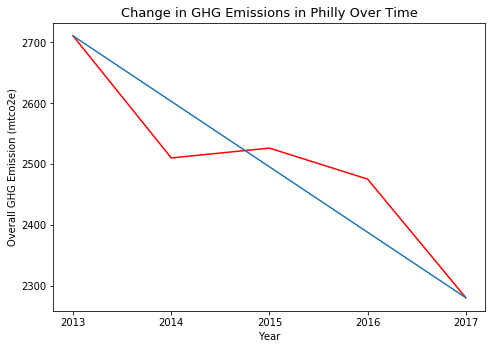

In [73]:
#overall plot
#spell out the x axis -- which years I am looking at            
years = [2013, 2014, 2015, 2016, 2017]
fig=plt.figure()


ax=fig.add_axes([0,0,1,1])
ax.plot(mean_df_final['Year'], mean_df_final['Overall'], color='r')
ax.set_xlabel('Year')
ax.set_ylabel('Overall GHG Emission (mtco2e)')
plt.xticks(years)
ax.set_title('Change in GHG Emissions in Philly Over Time', size=13)
 

first = mean_df_final.iloc[0]
last = mean_df_final.iloc[-1]

ax.plot([first['Year'], last['Year']], [first['Overall'], last['Overall']])
plt.show()



In [139]:
#Calculate percentage change from 2013 to 2017 
(last['Overall'] - first['Overall'])/(first['Overall'])

-0.15882033933321282

Overall, energy emissions have dropped 15.88% from 2013 to 2017

#### Graph 2: Change in GHG Emissions of Philly Office Buildings Over Time

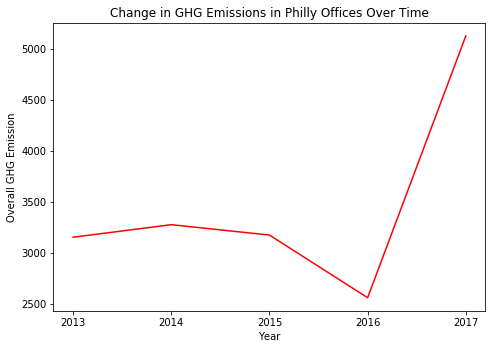

In [75]:
#office plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(mean_df_final['Year'], mean_df_final['Office'],color='r')
ax.set_xlabel('Year')
ax.set_ylabel('Office GHG Emission')
ax.set_ylabel('Overall GHG Emission')
plt.xticks(years)
ax.set_title('Change in GHG Emissions in Philly Offices Over Time')
plt.show()

Here we can see office GHG went up drastically in 2017

#### Graph 3: Change in GHG Emissions of Philly Residential Buildings Over Time

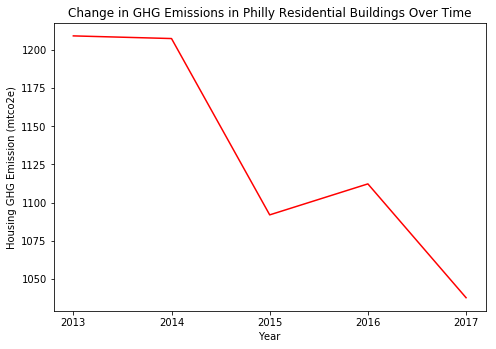

In [76]:
#housing plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(mean_df_final['Year'], mean_df_final['Housing'],color='r')
ax.set_xlabel('Year')
ax.set_ylabel('Housing GHG Emission (mtco2e)')
plt.xticks(years)
ax.set_title('Change in GHG Emissions in Philly Residential Buildings Over Time')
plt.show()

Here we see residential emissions have gone down 

#### Graph 4: Change in GHG Emissions of Philly Retail Buildings Over Time

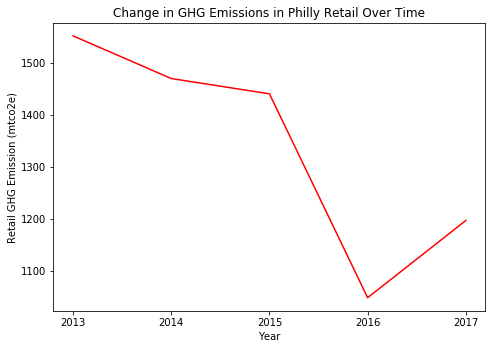

In [77]:
#retail plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(mean_df_final['Year'], mean_df_final['Retail'],color='r')
ax.set_xlabel('Year')
ax.set_ylabel('Retail GHG Emission (mtco2e)')
plt.xticks(years)
ax.set_title('Change in GHG Emissions in Philly Retail Over Time')
plt.show()

Here we can see retail has dropped - got higher in 2017 but down from 2013

#### Graph 5: Change in GHG Emissions of Philly Industrial Buildings Over Time

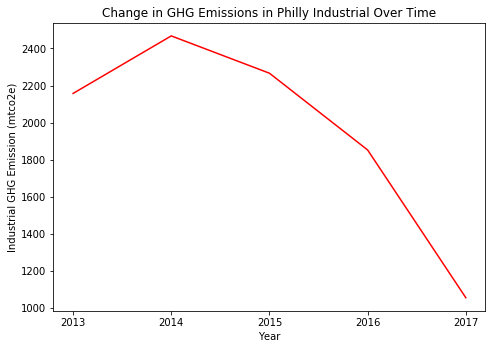

In [78]:
#industrial plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(mean_df_final['Year'], mean_df_final['Industrial'],color='r')
ax.set_xlabel('Year')
ax.set_ylabel('Industrial GHG Emission (mtco2e)')
plt.xticks(years)
ax.set_title('Change in GHG Emissions in Philly Industrial Over Time')
plt.show()

Industrial has gone down drastically 

## Step 4: Plot all the property types on one graph

Now that I have seen the individual plots, I want to build a code that puts all of the plots on the same graph. This will allow me to compare the different property types and their trends better

In [79]:
#create a general dataframe that reads in all the properties 
df = pd.read_csv('../data/properties_reported_2017.csv')

In [80]:
#make sure I know what all the columns are in these dataframes
df.columns

Index(['electricity_use_kbtu', 'objectid', 'street_address', 'property_name',
       'opa_account_num', 'postal_code', 'num_of_buildings', 'year_built',
       'primary_prop_type_epa_calc', 'total_floor_area_bld_pk_ft2',
       'portfolio_manager_id', 'natural_gas_use_kbtu', 'fuel_oil_o2_use_kbtu',
       'steam_use_kbtu', 'energy_star_score', 'site_eui_kbtuft2',
       'source_eui_kbtuft2', 'water_use_all_kgal',
       'total_ghg_emissions_mtco2e', 'notes'],
      dtype='object')

{'Housing': [1209.1235294117648, 1207.3823529411766, 1091.9238095238095, 1112.2093750000001, 1037.6772093023255], 'Education': [1269.7325581395348, 1222.3294314381271, 1153.4668604651163, 1862.0567723342938, 1646.1586510263928], 'Office': [3151.7652694610783, 3274.802285714286, 3172.988421052632, 2559.1029702970295, 5124.873999999999], 'Industrial': [2157.18547008547, 2467.942424242424, 2266.390178571429, 1851.92, 1054.0705357142856], 'Retail': [1551.3065789473685, 1469.3416666666667, 1439.9463414634145, 1048.0025974025973, 1196.443373493976]}


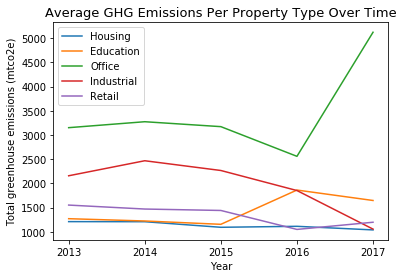

In [81]:
# bring back the categories dictionary to be able to separate out the property types I am interested in 
categories = {
    'Housing' : ['Multifamily Housing', 'Residential Care Facility', 'Other - Lodging/Residential', 'Residence Hall/Dormitory', 'Senior Care Community'],
    'Office' : ['Office', 'Financial Office'],
    'Science' : ['Other - Technology/Science', 'Data Center', 'Laboratory'],
    'Education' : ['K-12 School', 'College/University', 'Other - Education', 'Adult Education'],
    'Industrial' : ['Wastewater Treatment Plant', 'Other - Utility', 'Drinking Water Treatment & Distribution', 'Non-Refridgerated Warehouse', 'Distribution Center', 'Manufacturing/Industrial Plant', 'Self-Storage Facility', 'Refrigerated Warehouse'],
    'Hospitality' : ['Hotel'],
    'Retail' : ['Enclosed Mall', 'Wholesale Club/Supercenter', 'Food Sales', 'Bar/Nightclub', 'Automobile Dealership', 'Mailing Center/Post Office', 'Restaurant', 'Food Service', 'Retail Store','Supermarket/Grocery Store', 'Other - Mall','Strip Mall', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'],
    'Medical' : ['Other - Specialty Hospital', 'Hospital (General Medical & Surgical)', 'Outpatient Rehabilitation/Physical Therapy', 'Ambulatory Surgical Center', 'Medical Office'],
    'Religious' : ['Worship Facility'],
    'Sports/Entertainment' : ['Stadium (Open)', 'Other - Recreation', 'Ice/Curling Rink', 'Movie Theater', 'Fitness Center/Health Club/Gym', 'Stadium (Closed)', 'Performing Arts'],
    'Convention Center' : ['Convention Center'],
    'Public Services/Gov' : ['Other - Public Services', 'Social/Meeting Hall', 'Museum', 'Library', 'Courthouse'],
    'Prison' : ['Prison/Incarceration'],
    'Parking' : ['Parking'],
    'Mixed Use' : ['Mixed Use Property'],
    'Other': ['Other']
}

#brick back the code that reverses the dictionary 
categories2={}
for k, vlist in categories.items():
    for v in vlist:
        categories2[v]=k


filenames = ['energy_usage_large_commercial_buildings_reported_2013.csv',
             'energy_usage_large_commercial_buildings_reported_2014.csv',
             'properties_reported_2015.csv','properties_reported_2016.csv','properties_reported_2017.csv'
             ]
df = []

# add in a try and except because property type columns are named slightly differently for 2013 and 2014 vs 2015-2017
for name in filenames:
    temp = pd.read_csv('../data/' + name)
    try:
        temp['prop_cond']=temp['primary_prop_type_epa_calc'].map(categories2)
    except KeyError:
        temp['prop_cond']=temp['primary_property_type_epa_calculated'].map(categories2)
    df.append(temp)

# Here I need to spell out what property types I want on my graph since I am only looking at 5 of them
plot_data = dict()
graph_categories = ['Housing', 'Education', 'Office', 'Industrial','Retail']


# create a for loop that takes the categories I am looking at and plots their mean GHG emissions per year
for category in graph_categories:
    plot_data[category]=[]
    for frame in df:
        reduced_frame = frame.loc[frame['prop_cond'] == category]
        avg=np.nanmean(reduced_frame['total_ghg_emissions_mtco2e'])
        plot_data[category].append(avg)

print(plot_data)

#spell out the x axis -- which years I am looking at            
years = [2013, 2014, 2015, 2016, 2017]
for category in graph_categories:
    plt.plot(years, plot_data[category])

plt.xlabel('Year')
plt.ylabel('Total greenhouse emissions (mtco2e)')
plt.xticks(years) #make the x axis only the years as solid numbers
plt.title('Average GHG Emissions Per Property Type Over Time', size=13)
plt.legend(graph_categories)
plt.show()

## Step 5: Exploring GHG by year built
Are buildings that emit more GHG older?
Running this code continuously from 2000 on

In [82]:
#create a code that separates the buildings into bins from 2000 on
yr2017_df['year_built_group'] = pd.cut(yr2017_df['year_built'], bins=18, labels = ['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])

In [83]:
#2000
buildings2000 = yr2017_df[yr2017_df['year_built_group'].isin(['2000'])]

In [84]:
buildings2000['total_ghg_emissions_mtco2e'].mean()

19080.1

In [85]:
#2001
buildings2001 = yr2017_df[yr2017_df['year_built_group'].isin(['2001'])]

In [86]:
buildings2001['total_ghg_emissions_mtco2e'].mean()

nan

In [87]:
#2002
buildings2002 = yr2017_df[yr2017_df['year_built_group'].isin(['2002'])]

In [88]:
buildings2002['total_ghg_emissions_mtco2e'].mean()

nan

In [89]:
#2003 
buildings2003 = yr2017_df[yr2017_df['year_built_group'].isin(['2003'])]

In [90]:
buildings2003['total_ghg_emissions_mtco2e'].mean()

60.8

In [91]:
#2004
buildings2004 = yr2017_df[yr2017_df['year_built_group'].isin(['2004'])]

In [92]:
buildings2004['total_ghg_emissions_mtco2e'].mean()

667.6

In [93]:
#2005
buildings2005 = yr2017_df[yr2017_df['year_built_group'].isin(['2005'])]

In [94]:
buildings2005['total_ghg_emissions_mtco2e'].mean()

128.7

In [95]:
#2006
buildings2006 = yr2017_df[yr2017_df['year_built_group'].isin(['2006'])]

In [96]:
buildings2006['total_ghg_emissions_mtco2e'].mean()

1567.125

In [97]:
#2007
buildings2007 = yr2017_df[yr2017_df['year_built_group'].isin(['2007'])]

In [98]:
buildings2007['total_ghg_emissions_mtco2e'].mean()

795.3428571428573

In [99]:
#2008
buildings2008 = yr2017_df[yr2017_df['year_built_group'].isin(['2008'])]

In [100]:
buildings2008['total_ghg_emissions_mtco2e'].mean()

19006.93333333333

In [101]:
#2009
buildings2009 = yr2017_df[yr2017_df['year_built_group'].isin(['2009'])]

In [102]:
buildings2009['total_ghg_emissions_mtco2e'].mean()

1561.5520833333333

In [103]:
#2010
buildings2010 = yr2017_df[yr2017_df['year_built_group'].isin(['2010'])]

In [104]:
buildings2010['total_ghg_emissions_mtco2e'].mean()

1463.4116071428564

In [105]:
#2011
buildings2011 = yr2017_df[yr2017_df['year_built_group'].isin(['2011'])]

In [106]:
buildings2011['total_ghg_emissions_mtco2e'].mean()

1767.8604347826088

In [107]:
#2012
buildings2012 = yr2017_df[yr2017_df['year_built_group'].isin(['2012'])]

In [108]:
buildings2012['total_ghg_emissions_mtco2e'].mean()

1950.9594594594587

In [109]:
#2013
buildings2013 = yr2017_df[yr2017_df['year_built_group'].isin(['2013'])]

In [110]:
buildings2013['total_ghg_emissions_mtco2e'].mean()

1185.8531034482755

In [111]:
#2014
buildings2014 = yr2017_df[yr2017_df['year_built_group'].isin(['2014'])]

In [112]:
buildings2014['total_ghg_emissions_mtco2e'].mean()

3410.3221789883273

In [113]:
#2015
buildings2015 = yr2017_df[yr2017_df['year_built_group'].isin(['2015'])]

In [114]:
buildings2015['total_ghg_emissions_mtco2e'].mean()

2497.3354838709674

In [115]:
#2016
buildings2016 = yr2017_df[yr2017_df['year_built_group'].isin(['2016'])]

In [116]:
buildings2016['total_ghg_emissions_mtco2e'].mean()

2757.1107142857154

In [117]:
#2017
buildings2017 = yr2017_df[yr2017_df['year_built_group'].isin(['2017'])]

In [118]:
buildings2017['total_ghg_emissions_mtco2e'].mean()

1406.9550000000004

### Summary of this analysis:
Despite the numerous lines of code, I just went through, I don't think that this shows anything because it could just be that bigger buildings were created per year -- thus admitting more greenhouse gas per year. I thus think looking into energy STAR score will be better. This will show the scores per year and whether or not the buildings built more recently have gotten more efficient or not.

## Step 6: Analyze if buildings created since 2012 (yr benchmarking started) built more efficiently? 

First, I will create a dataframe that only has the buildings that were created from 2011 on. This will show me on year before benchmarking started to 5 years after the program began. 

In [119]:
subset_2011 = yr2017_df[yr2017_df['year_built_group'].astype(str).astype(int) >= 2011].copy()

In [120]:
subset_2011['year_built_group'] = subset_2011['year_built_group'].astype(str).astype(int)

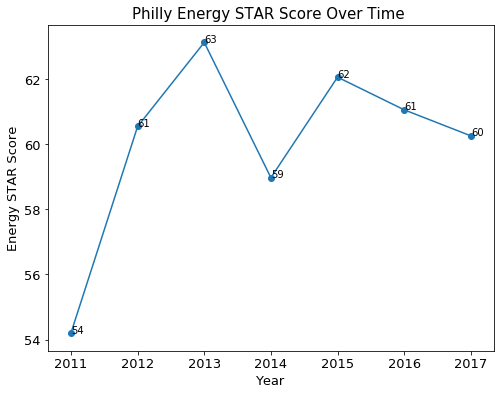

In [121]:
#set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

#create the variable means which is the energy star score mean per year 
means = subset_2011.groupby('year_built_group')['energy_star_score'].mean()

#set up plot so that the x axis is the year and the y axis is the mean
ax.plot(means.index, means.values)
ax.scatter(means.index, means.values)

#set up the annotation so that each plot is labeled with the energy STAR score
for x, y in zip(means.index, means.values):
    ax.annotate(f'{y:.0f}', (x, y))
    
ax.set_title('Philly Energy STAR Score Over Time ', fontsize=15)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Energy STAR Score', fontsize=13)

ax.tick_params(labelsize=13)

#### What does this graph tell us?
It shows that Energy STAR scores ever since the beginning of the benchmarking initiative in 2012 have not increased for Philly as a whole. You would think that buildings built more recently would be motivated by these plans to have higher scores but this analysis shows the opposite. 

In [122]:
#check that the plot is correct
means

year_built_group
2011    54.198795
2012    60.546875
2013    63.131313
2014    58.973262
2015    62.062992
2016    61.059322
2017    60.259036
Name: energy_star_score, dtype: float64

In [123]:
buildings2011['energy_star_score'].mean()

54.19879518072289

In [124]:
buildings2012['energy_star_score'].mean()

60.546875

In [125]:
buildings2013['energy_star_score'].mean()

63.13131313131313

In [126]:
buildings2014['energy_star_score'].mean()

58.973262032085564

In [127]:
buildings2015['energy_star_score'].mean()

62.06299212598425

In [128]:
buildings2016['energy_star_score'].mean()

61.059322033898304

In [129]:
buildings2017['energy_star_score'].mean()

60.25903614457831

The buildings all avg per year around the Philly mean-- no indication that those buildings built closer are more energy efficient than older ones built before the standards were put in place.

## Step 7: Plotting the energy STAR change over time by prop type

In [130]:
# bring back the code for the property type dictionary 
categories = {
    'Housing' : ['Multifamily Housing', 'Residential Care Facility', 'Other - Lodging/Residential', 'Residence Hall/Dormitory', 'Senior Care Community'],
    'Office' : ['Office', 'Financial Office'],
    'Science' : ['Other - Technology/Science', 'Data Center', 'Laboratory'],
    'Education' : ['K-12 School', 'College/University', 'Other - Education', 'Adult Education'],
    'Industrial' : ['Wastewater Treatment Plant', 'Other - Utility', 'Drinking Water Treatment & Distribution', 'Non-Refridgerated Warehouse', 'Distribution Center', 'Manufacturing/Industrial Plant', 'Self-Storage Facility', 'Refrigerated Warehouse'],
    'Hospitality' : ['Hotel'],
    'Retail' : ['Enclosed Mall', 'Wholesale Club/Supercenter', 'Food Sales', 'Bar/Nightclub', 'Automobile Dealership', 'Mailing Center/Post Office', 'Restaurant', 'Food Service', 'Retail Store','Supermarket/Grocery Store', 'Other - Mall','Strip Mall', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)'],
    'Medical' : ['Other - Specialty Hospital', 'Hospital (General Medical & Surgical)', 'Outpatient Rehabilitation/Physical Therapy', 'Ambulatory Surgical Center', 'Medical Office'],
    'Religious' : ['Worship Facility'],
    'Sports/Entertainment' : ['Stadium (Open)', 'Other - Recreation', 'Ice/Curling Rink', 'Movie Theater', 'Fitness Center/Health Club/Gym', 'Stadium (Closed)', 'Performing Arts'],
    'Convention Center' : ['Convention Center'],
    'Public Services/Gov' : ['Other - Public Services', 'Social/Meeting Hall', 'Museum', 'Library', 'Courthouse'],
    'Prison' : ['Prison/Incarceration'],
    'Parking' : ['Parking'],
    'Mixed Use' : ['Mixed Use Property'],
    'Other': ['Other']
}

#bring back the code that reverses the dictionary 
categories2={}
for k, vlist in categories.items():
    for v in vlist:
        categories2[v]=k

#read in all my files for the loop
filenames = ['energy_usage_large_commercial_buildings_reported_2013.csv',
             'energy_usage_large_commercial_buildings_reported_2014.csv',
             'properties_reported_2015.csv','properties_reported_2016.csv','properties_reported_2017.csv'
             ]
dfs = []


for name in filenames:
    temp = pd.read_csv('../data/' + name)
    try:
        temp['prop_cond']=temp['primary_prop_type_epa_calc'].map(categories2)
    except KeyError:
        temp['prop_cond']=temp['primary_property_type_epa_calculated'].map(categories2)
    dfs.append(temp)


In [131]:
#create a dataframe that puts together a multi-level dataframe whereby it is first grouped by property type and then year 
#since my years run in order from 2013-2017 for the data that I have --- we can use "enumerate" to start at 2013 and go to 2017
grouping_df = pd.concat([df[['prop_cond', 'energy_star_score']].assign(year=year) for year, df in enumerate(dfs, 2013)])

#tell the categories that I want to focus on 
focus_categories = ['Education', 'Housing', 'Industrial', 'Retail', 'Office']

#filter out just the buildings with the property types that I am interested n 
filtered_grouping_df = grouping_df[grouping_df['prop_cond'].isin(focus_categories)]

#using the coerce function -- this will change the energy STAR scores to numbers and coerce those energy STAR scores that say "Not Available" to NA and will then drop them 
cleaned_grouping_df = filtered_grouping_df.assign(energy_star_score=pd.to_numeric(filtered_grouping_df['energy_star_score'], errors='coerce')).dropna()

In [132]:
#create the means frame that is multi level -- level 1 will be the property condition and level 2 will be the year 
means = cleaned_grouping_df.groupby(['prop_cond', 'year'])['energy_star_score'].mean()

In [133]:
#make sure that the condensed properties are the first level and that they are all unique values
conds = means.index.get_level_values(0).unique()

Text(0, 0.5, 'Energy STAR Score')

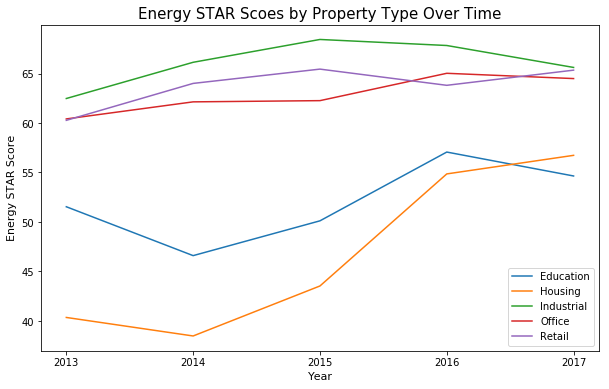

In [134]:
#plot the energy STAR scores per property type over time

#set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

#using the property type condensed varaible we created, get the mean of each property type per year and then plot that over time
for cond in conds:
    cond_means = means.loc[means.index.get_level_values(0) == cond][cond]
    x = cond_means.index #the index is the year, thus this should be the x axis
    y = cond_means.values #the actual mean value will be the y axis 
    
    ax.plot(x, y, label=cond)
    
ax.legend(loc='lower right')
ax.set_title('Energy STAR Scoes by Property Type Over Time', fontsize=15)
ax.set_xlabel('Year', fontsize=11)
plt.xticks(years) # make sure the x axis is year over year 
ax.set_ylabel('Energy STAR Score', fontsize=11)

In [135]:
#to better understand my code -- I had a multilevel dataframe so level 1 are my years and level 0 were my property types
means.index.get_level_values(1)

Int64Index([2013, 2014, 2015, 2016, 2017, 2013, 2014, 2015, 2016, 2017, 2013,
            2014, 2015, 2016, 2017, 2013, 2014, 2015, 2016, 2017, 2013, 2014,
            2015, 2016, 2017],
           dtype='int64', name='year')

In [136]:
means

prop_cond   year
Education   2013    51.538012
            2014    46.600000
            2015    50.115079
            2016    57.064000
            2017    54.646341
Housing     2013    40.352941
            2014    38.481481
            2015    43.533333
            2016    54.855769
            2017    56.731959
Industrial  2013    62.475000
            2014    66.133333
            2015    68.440000
            2016    67.829787
            2017    65.613636
Office      2013    60.411348
            2014    62.136054
            2015    62.258824
            2016    65.021978
            2017    64.488889
Retail      2013    60.269231
            2014    64.000000
            2015    65.444444
            2016    63.807692
            2017    65.339623
Name: energy_star_score, dtype: float64

This graph shows many things. For one, although we know that energy STAR scores have stayed stagnant in buildings built over the past 5 years -- when dividing up by property type a more detailed story is formed. 
Observations:
* Industrial has stayed stagnant
* Housing is being built far more efficiently 
* Office is staying steady with a slight increase -- most surprising to me since when I think of Energy STAR program I think of incentivizing landlords of office buildings
* It seems as if buildings for Education are being built slightly more efficient
* Retail has stayed stagnant 

Overall, the scores have not really changed much showing that developers have not yet been incentivized enough to build these new buildings according to Energy STAR standards. This suggests that legislation and government programs should better focus in on this for newly constructed buildings since it is less costly to build efficiently than it is to retrofit later on.